In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional




In [2]:
#Read file from local
AAPL = pd.read_csv("AAPL.csv")
AMD = pd.read_csv("AMD.csv")

#Change Date into datetime
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AMD['Date'] = pd.to_datetime(AMD['Date'])

#Set the index of the dataset using Date
AAPL=AAPL.set_index('Date')
AMD=AMD.set_index('Date')


# Case A

## 1.Exploring the Data

### 1.1 AAPL

#### Info about data

In [3]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [4]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


Kedua dataset tidak memiliki data yang kosong atau null, dimana data dari AAPL terdiri dari 9909 baris data dan memiliki 6 buah column yang terdiri dari Open,High,Low,Close, Adj Close, dan Volume

#### Check Movement of the closing Stock price of AAPL

Closing Price menandakan harga terakhir saham sebelum perdagangan saham ditutup pada hari yang bersangkutan.

Text(0.5, 1.0, 'Closing Price of AAPL')

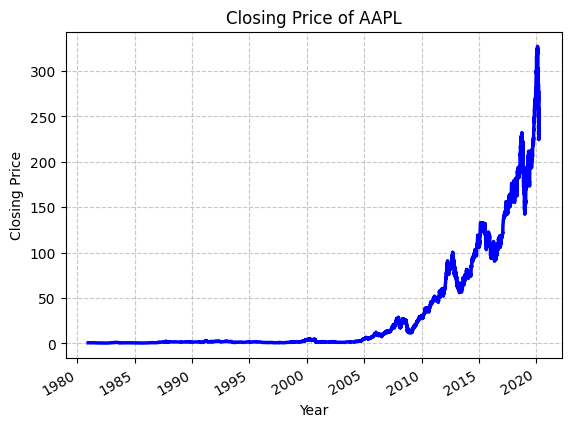

In [7]:
#Take Closing Price of AAPL
AAPL['Close'].plot(color='blue', linewidth=2.5)
plt.ylabel('Closing Price')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=10)
plt.title("Closing Price of AAPL")


Terlihat bahwa seiring bertambahnya tahun,saham AAPL mengalami peningkatan yang cukup signifikan dari 1980-2020.

AAPL mengalami harga yang cukup stagnan sampai awal 2000an dan meningkat drastis sampai bernilai 330an di tahun 2020

### 1.2 AMD

#### Info about data

In [8]:
AMD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [9]:
AMD.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,45.779999,47.500000,45.400002,47.500000,47.500000,73680200
2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200
2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600
2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700
2020-04-01,44.180000,46.849998,43.160000,43.660000,43.660000,91895000


In [10]:
AMD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


In [11]:
AMD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,10.889136,11.462153,10.958702,11.210802,11.210802,1.451625e+07
std,8.615288,8.475056,8.077069,8.283645,8.283645,2.396199e+07
min,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.562500,5.062500,4.812500,4.937500,4.937500,1.098600e+06
50%,9.062500,9.280625,8.875000,9.062500,9.062500,5.518500e+06
75%,14.747500,15.000000,14.435625,14.707500,14.707500,1.742722e+07
max,58.439999,59.270000,57.509998,58.900002,58.900002,3.250584e+08


Terlihat bahwa dari segi kolom, AMD tidak memiliki perbedaan dengan AAPL, tetapi AMD memiliki rekor data yang lebih besar. Hal ini disebabkan oleh data AMD yang dimulai pada bulan Maret 1980, lebih cepat 9 bulan dari AAPL

#### Check Movement of the closing Stock price of AMD

Text(0.5, 1.0, 'Closing Price of AMD')

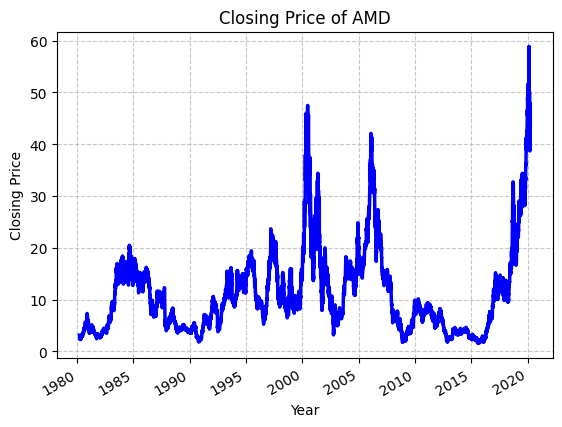

In [12]:
#Take Closing Price of AMD
AMD['Close'].plot(color='blue', linewidth=2.5)
plt.ylabel('Closing Price')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=10)
plt.title("Closing Price of AMD")


Terlihat bahwa tidak seperti AAPL yang terus meningkat secara waktu ke waktu, AMD mengalami peningkatan nilai yang cukup fluktuatif

## 2.Preprocessing Data

### Drop All Unnecessary Column

In [13]:
#Cukup sisakan hanya Close
AAPL = AAPL.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
AMD = AMD.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [14]:
AAPL.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [15]:
AMD.head()

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


In [16]:
print(AAPL.shape)
print(AMD.shape)

(9909, 1)
(10098, 1)


### Reshape Data

In [17]:
AAPL = np.array(AAPL).reshape(-1,1)
AMD = np.array(AMD).reshape(-1,1)

### Normalize Data

Normalisasi data tidak dilakukan, sebab dari hasil trial and error, model LSTM dengan data yang tidak discaling menghasilkan MAPE yang lebih rendah

## 3.Separate Input and Output + Separate train,test,valid

### Separate dataset into I/O with winsize = 5 & Horizon = 1

In [18]:
#Function untuk separate data
def create_windows(data, window_size, horizon):
    windows = []
    targets = []
    for i in range(len(data) - window_size - horizon + 1):
        windows.append(data[i:i+window_size])
        targets.append(data[i+window_size:i+window_size+horizon])
    return np.array(windows),np.array(targets)

def window_preview(windows, target, ranges):
  for i in range(ranges):
    print(f"\nWindow: \n{windows[i]} \n-> Horizon: {target[i]}")


In [19]:
#Separate data menjadi input dan output
winsize = 5
horizon = 1

AAPL_x,AAPL_y = create_windows(AAPL,winsize,horizon)
AMD_x,AMD_y = create_windows(AMD,winsize,horizon)

In [20]:
window_preview(AAPL_x,AAPL_y,1)


Window: 
[[0.51339287]
 [0.48660713]
 [0.45089287]
 [0.46205357]
 [0.47544643]] 
-> Horizon: [[0.50446427]]


In [21]:
print(AAPL_x.shape)
print(AAPL_y.shape)

#reshape y into 2 dimentional only
AAPL_y = AAPL_y.reshape(AAPL_y.shape[0],AAPL_y.shape[1])
AMD_y = AMD_y.reshape(AMD_y.shape[0],AMD_y.shape[1])

(9904, 5, 1)
(9904, 1, 1)


In [22]:
#Check current shape
print(AAPL_y.shape)
print(AMD_y.shape)

(9904, 1)
(10093, 1)


### Separate the dataset into Train,Valid, and Test

In [23]:
def split_data(x, y, ratio_train, ratio_valid, ratio_test):
    num_train = int(ratio_train * len(x))
    num_valid = int(ratio_valid * len(x))
    num_test = len(x) - num_train - num_valid

    x_train = x[:num_train]
    x_valid = x[num_train:num_train+num_valid]
    x_test = x[num_train+num_valid:]

    y_train = y[:num_train]
    y_valid = y[num_train:num_train+num_valid]
    y_test = y[num_train+num_valid:]

    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [24]:
#Input the Ratio in the Function and check the result
x_train_AAPL, x_valid_AAPL, x_test_AAPL, y_train_AAPL, y_valid_AAPL, y_test_AAPL = split_data(AAPL_x, AAPL_y, 0.8, 0.1, 0.1)

x_train_AMD, x_valid_AMD, x_test_AMD, y_train_AMD, y_valid_AMD, y_test_AMD = split_data(AMD_x, AMD_y, 0.8, 0.1, 0.1)

print(x_train_AAPL.shape)
print(y_train_AAPL.shape)

print(x_valid_AAPL.shape)
print(y_valid_AAPL.shape)

print(x_test_AAPL.shape)
print(y_test_AAPL.shape)


print(x_train_AMD.shape)
print(y_train_AMD.shape)

print(x_valid_AMD.shape)
print(y_valid_AMD.shape)

print(x_test_AMD.shape)
print(y_test_AMD.shape)


(7923, 5, 1)
(7923, 1)
(990, 5, 1)
(990, 1)
(991, 5, 1)
(991, 1)
(8074, 5, 1)
(8074, 1)
(1009, 5, 1)
(1009, 1)
(1010, 5, 1)
(1010, 1)


# Case B

## Build and Train Baseline Model

In [25]:
#Baseline Architecture
tf.keras.backend.clear_session()

baseline_model = Sequential()
baseline_model.add(LSTM(units=50, activation='relu', input_shape=(winsize,1)))
baseline_model.add(Dense(units=1,activation='relu'))

# Compile the model
baseline_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

# Print the model summary
baseline_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### AAPL

In [26]:
baseline_history_AAPL = baseline_model.fit(x_train_AAPL,y_train_AAPL,epochs = 20,batch_size = 30, validation_data=(x_valid_AAPL,y_valid_AAPL))

Epoch 1/20
265/265 [==============================] - 7s 13ms/step - loss: 12.2347 - val_loss: 4.7491
Epoch 2/20
265/265 [==============================] - 3s 10ms/step - loss: 0.2453 - val_loss: 4.4566
Epoch 3/20
265/265 [==============================] - 4s 14ms/step - loss: 0.2119 - val_loss: 3.0076
Epoch 4/20
265/265 [==============================] - 3s 11ms/step - loss: 0.2078 - val_loss: 5.1939
Epoch 5/20
265/265 [==============================] - 3s 11ms/step - loss: 0.1876 - val_loss: 3.7775
Epoch 6/20
265/265 [==============================] - 3s 12ms/step - loss: 0.2348 - val_loss: 5.8780
Epoch 7/20
265/265 [==============================] - 3s 13ms/step - loss: 0.1661 - val_loss: 5.1132
Epoch 8/20
265/265 [==============================] - 3s 12ms/step - loss: 0.2120 - val_loss: 3.3099
Epoch 9/20
265/265 [==============================] - 3s 12ms/step - loss: 0.1718 - val_loss: 3.2819
Epoch 10/20
265/265 [==============================] - 2s 8ms/step - loss: 0.1885 - val_lo

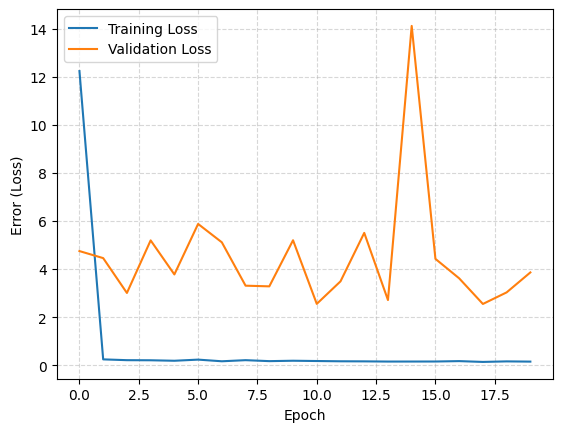

In [27]:
plt.plot(baseline_history_AAPL.history['loss'], label ='Training Loss')
plt.plot(baseline_history_AAPL.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

Terlihat bahwa masih terjadi overfitting , dimana validation loss masih bernilai jauh lebih tinggi daripada training loss


### AMD

In [28]:
baseline_history_AMD = baseline_model.fit(x_train_AMD,y_train_AMD,epochs = 20,batch_size = 30, validation_data=(x_valid_AMD,y_valid_AMD))

Epoch 1/20
270/270 [==============================] - 2s 9ms/step - loss: 0.3243 - val_loss: 0.0177
Epoch 2/20
270/270 [==============================] - 1s 5ms/step - loss: 0.3156 - val_loss: 0.0179
Epoch 3/20
270/270 [==============================] - 2s 6ms/step - loss: 0.2915 - val_loss: 0.0249
Epoch 4/20
270/270 [==============================] - 1s 5ms/step - loss: 0.3019 - val_loss: 0.0238
Epoch 5/20
270/270 [==============================] - 1s 5ms/step - loss: 0.3050 - val_loss: 0.0157
Epoch 6/20
270/270 [==============================] - 2s 6ms/step - loss: 0.2992 - val_loss: 0.0157
Epoch 7/20
270/270 [==============================] - 2s 6ms/step - loss: 0.3045 - val_loss: 0.0148
Epoch 8/20
270/270 [==============================] - 2s 8ms/step - loss: 0.3216 - val_loss: 0.0152
Epoch 9/20
270/270 [==============================] - 2s 7ms/step - loss: 0.2994 - val_loss: 0.0312
Epoch 10/20
270/270 [==============================] - 2s 6ms/step - loss: 0.2920 - val_loss: 0.0156

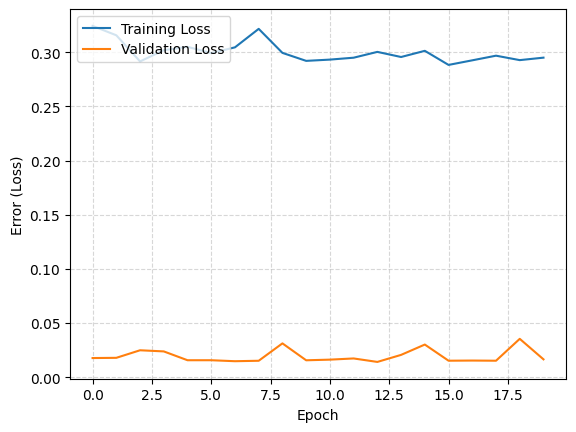

In [29]:
plt.plot(baseline_history_AMD.history['loss'], label ='Training Loss')
plt.plot(baseline_history_AMD.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

Terlihat bahwa keduanya sebenernya sudah memiliki angka yang cukup baik, yaitu dibawah 0. Namun, disini malih terlihat bahwa validation loss memiliki loss yang lebih rendah daripada training loss

## Evaluate Baseline Model

### AAPL

In [30]:
#Evaluasi dilakukan dengan training set dan testing set
y_train_predicted_AAPL = baseline_model.predict(x_train_AAPL)
y_test_predicted_AAPL = baseline_model.predict(x_test_AAPL)

31/31 [==============================] - 0s 3ms/step


In [31]:
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted,name):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"rmse": rmse.numpy(),
          "mae": mae.numpy(),
          "mape": mape.numpy()}

# return_rmse(y_test_AAPL,y_predicted_AAPL)

In [32]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(y_train_AAPL,y_train_predicted_AAPL))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AAPL,y_test_predicted_AAPL))

Evalution of AAPL with Training Set
{'rmse': 0.23730148, 'mae': 0.23730148, 'mape': 5.4019976}
Evaluation of AAPL with Testing Set
{'rmse': 14.703662, 'mae': 14.703662, 'mape': 8.071868}


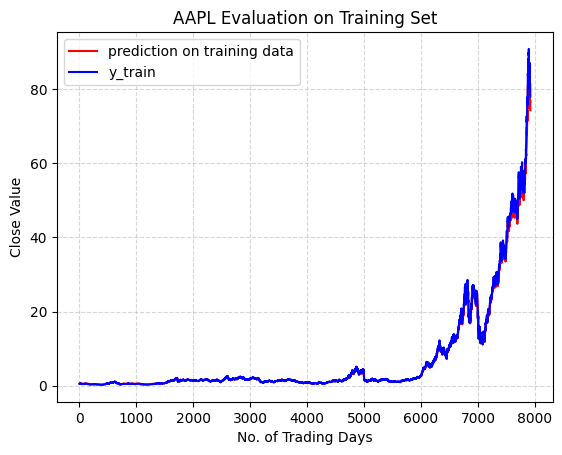

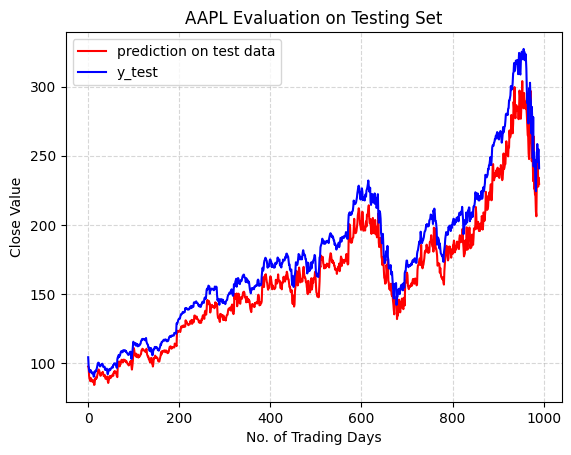

In [33]:
plt.plot(y_train_predicted_AAPL,color='red', label='prediction on training data')
plt.plot(y_train_AAPL,color='blue', label='y_train')
plt.title("AAPL Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AAPL,color='red', label='prediction on test data')
plt.plot(y_test_AAPL,color='blue', label='y_test')
plt.title("AAPL Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

### AMD

In [34]:
#Evaluasi dilakukan dengan training set dan testing set
y_train_predicted_AMD = baseline_model.predict(x_train_AMD)
y_test_predicted_AMD = baseline_model.predict(x_test_AMD)

32/32 [==============================] - 0s 2ms/step


In [35]:
print("Evalution of AMD with Training Set")
print(evaluate_preds(y_train_AMD,y_train_predicted_AMD))

print("Evaluation of AMD with Testing Set")
print(evaluate_preds(y_test_AMD,y_test_predicted_AMD))

Evalution of AMD with Training Set
{'rmse': 0.32462034, 'mae': 0.32462034, 'mape': 2.884697}
Evaluation of AMD with Testing Set
{'rmse': 0.62700206, 'mae': 0.62700206, 'mape': 3.0973682}


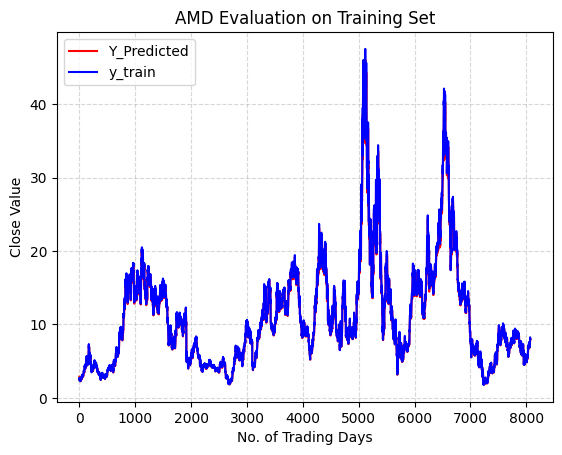

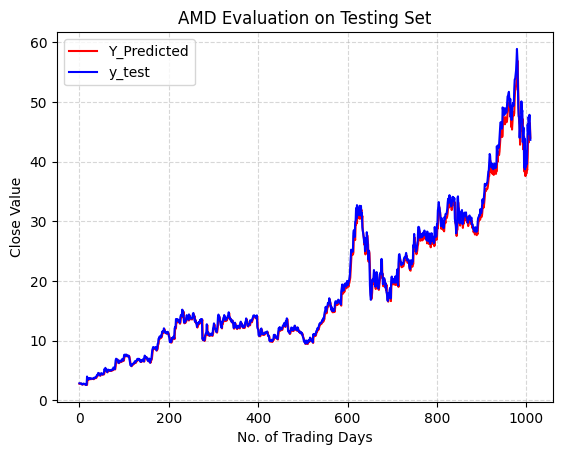

In [43]:
plt.plot(y_train_predicted_AMD,color='red', label='Y_Predicted')
plt.plot(y_train_AMD,color='blue', label='y_train')
plt.title("AMD Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AMD,color='red', label='Y_Predicted')
plt.plot(y_test_AMD,color='blue', label='y_test')
plt.title("AMD Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

## Summary of Baseline Model

Terlihat bahwa sebenarnya, model baseline LSTM kedua saham sudah memiliki nilai prediksi yang cukup baik, dimana persentase error kedua saham hanya bernilai <10 %, dimana prediksi saham AAPL pada testing set memiliki nilai error 8 % dan pada saham AMD bernilai 3%

# Case C

## Trial 1

hal yang dilakukan pada percobaan arsitektur pertama ini adalah dengan mengurangi unit pada LSTM Layers. Sebab, untuk data yang tergolong tidak terlalu kompleks, model dengan kompleksitas yang tinggi akan menyebabkan penurunan performa prediksi

### AAPL

In [37]:
#Modified Architecture
tf.keras.backend.clear_session()

modified_model = Sequential()
modified_model.add(LSTM(units=20, activation='relu', input_shape=(winsize, 1)))
modified_model.add(Dense(units=1, activation='relu'))

# Compile the model
modified_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

# Print the model summary
modified_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [38]:
modified_history_AAPL = modified_model.fit(x_train_AAPL,y_train_AAPL,epochs = 50,batch_size = 20, validation_data=(x_valid_AAPL,y_valid_AAPL))

Epoch 1/50
397/397 [==============================] - 4s 5ms/step - loss: 9.4198 - val_loss: 12.1055
Epoch 2/50
397/397 [==============================] - 2s 6ms/step - loss: 0.2420 - val_loss: 4.5208
Epoch 3/50
397/397 [==============================] - 2s 6ms/step - loss: 0.2046 - val_loss: 3.2560
Epoch 4/50
397/397 [==============================] - 2s 5ms/step - loss: 0.1820 - val_loss: 4.6620
Epoch 5/50
397/397 [==============================] - 2s 4ms/step - loss: 0.1575 - val_loss: 2.7260
Epoch 6/50
397/397 [==============================] - 2s 5ms/step - loss: 0.1659 - val_loss: 5.0615
Epoch 7/50
397/397 [==============================] - 2s 4ms/step - loss: 0.1402 - val_loss: 2.5800
Epoch 8/50
397/397 [==============================] - 2s 4ms/step - loss: 0.1449 - val_loss: 4.3207
Epoch 9/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1339 - val_loss: 23.3659
Epoch 10/50
397/397 [==============================] - 2s 5ms/step - loss: 0.2939 - val_loss: 5.62

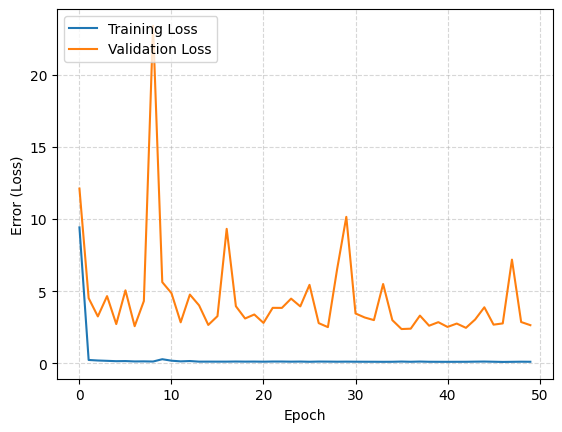

In [44]:
plt.plot(modified_history_AAPL.history['loss'], label ='Training Loss')
plt.plot(modified_history_AAPL.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

### AMD

In [45]:
modified_history_AMD = modified_model.fit(x_train_AMD,y_train_AMD,epochs = 50,batch_size = 32, validation_data=(x_valid_AMD,y_valid_AMD))

Epoch 1/50
253/253 [==============================] - 2s 8ms/step - loss: 0.2851 - val_loss: 0.0135
Epoch 2/50
253/253 [==============================] - 2s 7ms/step - loss: 0.2796 - val_loss: 0.0160
Epoch 3/50
253/253 [==============================] - 2s 7ms/step - loss: 0.2742 - val_loss: 0.0156
Epoch 4/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2721 - val_loss: 0.0138
Epoch 5/50
253/253 [==============================] - 1s 6ms/step - loss: 0.2768 - val_loss: 0.0174
Epoch 6/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2808 - val_loss: 0.0157
Epoch 7/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2793 - val_loss: 0.0136
Epoch 8/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2774 - val_loss: 0.0128
Epoch 9/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2809 - val_loss: 0.0133
Epoch 10/50
253/253 [==============================] - 1s 5ms/step - loss: 0.2787 - val_loss: 0.0272

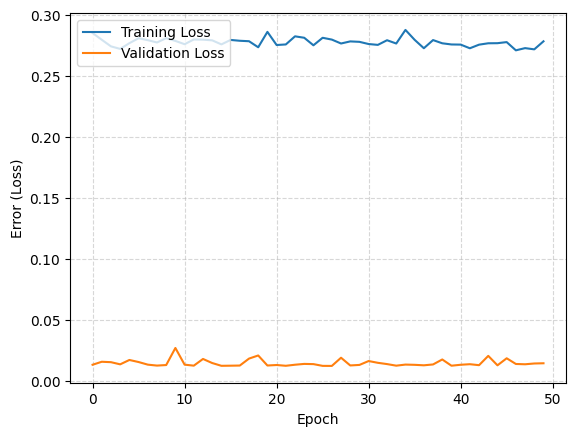

In [46]:
plt.plot(modified_history_AMD.history['loss'], label ='Training Loss')
plt.plot(modified_history_AMD.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error (Loss)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

Terlihat bahwa penurunan unit LSTM berpengaruh cukup baik pada AAPL, dimana Validation Loss cukup menurun dengan baik, dimana sudah berkisar diantara 3-4. Namun, tidak ada perubahan berarti pada prediksi saham AMD

### Evaluation of Trial 1

#### AAPL

In [49]:
y_train_predicted_AAPL_modified = modified_model.predict(x_train_AAPL)
y_test_predicted_AAPL_modified = modified_model.predict(x_test_AAPL)

31/31 [==============================] - 0s 2ms/step


In [50]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(y_train_AAPL,y_train_predicted_AAPL_modified))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AAPL,y_test_predicted_AAPL_modified))

Evalution of AAPL with Training Set
{'rmse': 0.12798788, 'mae': 0.12798788, 'mape': 2.937969}
Evaluation of AAPL with Testing Set
{'rmse': 3.1089704, 'mae': 3.1089704, 'mape': 1.661748}


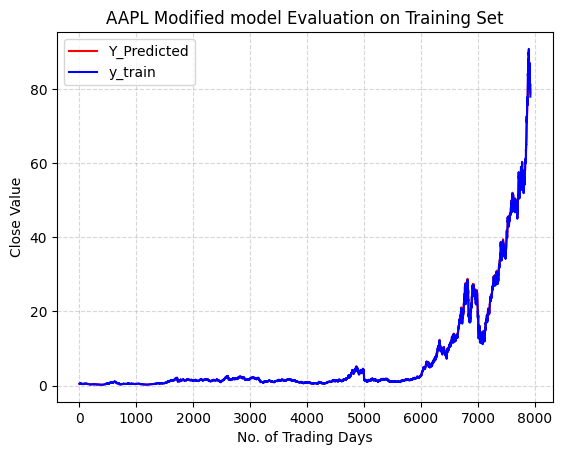

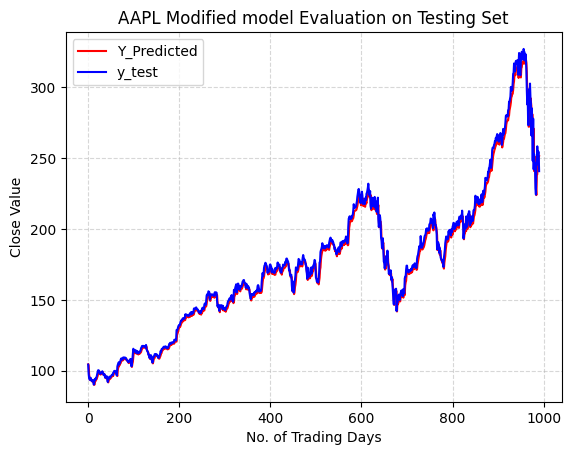

In [51]:
plt.plot(y_train_predicted_AAPL_modified,color='red', label='Y_Predicted')
plt.plot(y_train_AAPL,color='blue', label='y_train')
plt.title("AAPL Modified model Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AAPL_modified,color='red', label='Y_Predicted')
plt.plot(y_test_AAPL,color='blue', label='y_test')
plt.title("AAPL Modified model Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

#### AMD

In [52]:
y_train_predicted_AMD_modified = modified_model.predict(x_train_AMD)
y_test_predicted_AMD_modified = modified_model.predict(x_test_AMD)

32/32 [==============================] - 0s 7ms/step


In [53]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(y_train_AMD,y_train_predicted_AMD_modified))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AMD,y_test_predicted_AMD_modified))

Evalution of AAPL with Training Set
{'rmse': 0.31452766, 'mae': 0.31452766, 'mape': 2.833604}
Evaluation of AAPL with Testing Set
{'rmse': 0.5216774, 'mae': 0.5216774, 'mape': 2.7687874}


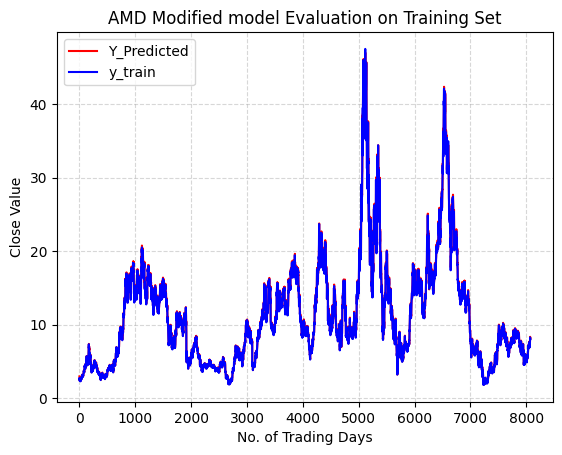

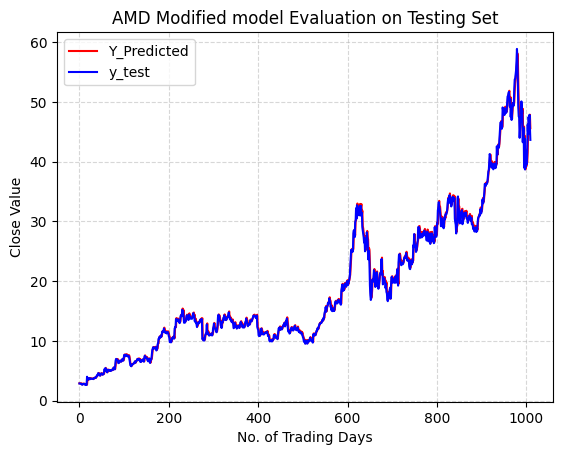

In [121]:
plt.plot(y_train_predicted_AMD_modified,color='red', label='Y_Predicted')
plt.plot(y_train_AMD,color='blue', label='y_train')
plt.title("AMD Modified model Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AMD_modified,color='red', label='Y_Predicted')
plt.plot(y_test_AMD,color='blue', label='y_test')
plt.title("AMD Modified model Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

## Trial 2 (BiLSTM) -> Final Model

Pada kasus kali ini, saya akan menggunakan BiLSTM sebagai pengganti dari LSTM biasa. Hal ini disebabkan karena BiLSTM dapat menerima informasi dari masa lalu maupun masa depan, sehingga model yang diprediksi akan menjadi lebih baik dengan menerima informasi dua arah tersebut

Namun, yang dapat menjadi catatan adalah, BiLSTM memakan waktu yang cukup lama dalam pemodelannya, sehingga perlu kesabaran lebih dalam menunggu pemodelan selesai

In [89]:
#Modified Architecture 2
tf.keras.backend.clear_session()

modified_model2 = Sequential()
modified_model2.add(Bidirectional(LSTM(units=20, activation='relu', input_shape=(winsize, 1))))
modified_model2.add(Dense(units=1, activation='relu'))

modified_model2.build(input_shape=(None,winsize, 1))

# Compile the model
modified_model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=0.001))

# Print the model summary
modified_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 40)               3520      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


### AAPL

In [93]:
modified_model2_AAPL = modified_model2.fit(x_train_AAPL,y_train_AAPL,epochs = 50,batch_size = 20, validation_data=(x_valid_AAPL,y_valid_AAPL))

Epoch 1/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1943 - val_loss: 12.0145
Epoch 2/50
397/397 [==============================] - 3s 7ms/step - loss: 0.2217 - val_loss: 6.9347
Epoch 3/50
397/397 [==============================] - 3s 8ms/step - loss: 0.2217 - val_loss: 16.3587
Epoch 4/50
397/397 [==============================] - 3s 9ms/step - loss: 0.2046 - val_loss: 11.8444
Epoch 5/50
397/397 [==============================] - 3s 7ms/step - loss: 0.2214 - val_loss: 8.1165
Epoch 6/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1643 - val_loss: 4.4339
Epoch 7/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1572 - val_loss: 12.0268
Epoch 8/50
397/397 [==============================] - 4s 10ms/step - loss: 0.1533 - val_loss: 12.4937
Epoch 9/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1697 - val_loss: 5.5213
Epoch 10/50
397/397 [==============================] - 3s 7ms/step - loss: 0.1660 - val_loss: 

#### Evaluation on AAPL

In [94]:
y_train_predicted_AAPL_modified2 = modified_model2.predict(x_train_AAPL)
y_test_predicted_AAPL_modified2 = modified_model2.predict(x_test_AAPL)

31/31 [==============================] - 0s 3ms/step


In [95]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(y_train_AAPL,y_train_predicted_AAPL_modified2))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AAPL,y_test_predicted_AAPL_modified2))

Evalution of AAPL with Training Set
{'rmse': 0.1456883, 'mae': 0.1456883, 'mape': 3.0002632}
Evaluation of AAPL with Testing Set
{'rmse': 2.3591516, 'mae': 2.3591516, 'mape': 1.2718405}


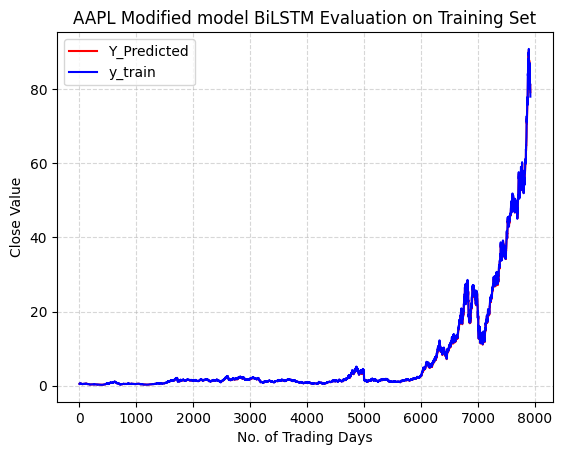

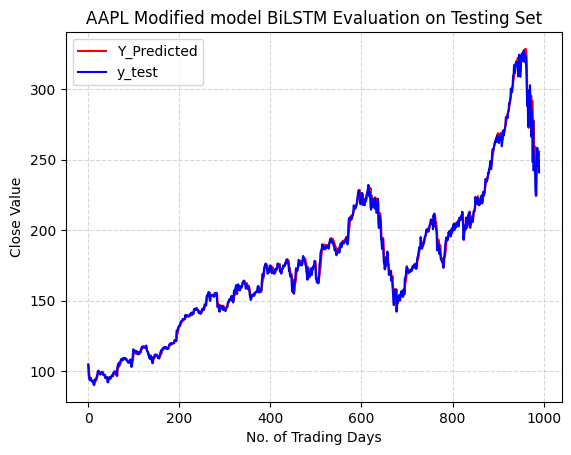

In [97]:
plt.plot(y_train_predicted_AAPL_modified2,color='red', label='Y_Predicted')
plt.plot(y_train_AAPL,color='blue', label='y_train')
plt.title("AAPL Modified model BiLSTM Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AAPL_modified2,color='red', label='Y_Predicted')
plt.plot(y_test_AAPL,color='blue', label='y_test')
plt.title("AAPL Modified model BiLSTM Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

### AMD

In [96]:
modified_model2_AMD = modified_model2.fit(x_train_AMD,y_train_AMD,epochs = 50,batch_size = 20, validation_data=(x_valid_AMD,y_valid_AMD))

Epoch 1/50
404/404 [==============================] - 4s 9ms/step - loss: 0.2999 - val_loss: 0.0147
Epoch 2/50
404/404 [==============================] - 3s 8ms/step - loss: 0.2935 - val_loss: 0.0179
Epoch 3/50
404/404 [==============================] - 3s 8ms/step - loss: 0.2850 - val_loss: 0.0170
Epoch 4/50
404/404 [==============================] - 3s 7ms/step - loss: 0.2967 - val_loss: 0.0153
Epoch 5/50
404/404 [==============================] - 3s 7ms/step - loss: 0.2918 - val_loss: 0.0135
Epoch 6/50
404/404 [==============================] - 3s 7ms/step - loss: 0.2892 - val_loss: 0.0237
Epoch 7/50
404/404 [==============================] - 4s 9ms/step - loss: 0.2935 - val_loss: 0.0242
Epoch 8/50
404/404 [==============================] - 3s 7ms/step - loss: 0.2918 - val_loss: 0.0133
Epoch 9/50
404/404 [==============================] - 3s 7ms/step - loss: 0.2933 - val_loss: 0.0153
Epoch 10/50
404/404 [==============================] - 3s 6ms/step - loss: 0.2861 - val_loss: 0.0180

#### Evaluation on AMD

In [98]:
y_train_predicted_AMD_modified2 = modified_model2.predict(x_train_AMD)
y_test_predicted_AMD_modified2 = modified_model2.predict(x_test_AMD)

32/32 [==============================] - 0s 3ms/step


In [99]:
print("Evalution of AAPL with Training Set")
print(evaluate_preds(y_train_AMD,y_train_predicted_AMD_modified2))

print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AMD,y_test_predicted_AMD_modified2))

Evalution of AAPL with Training Set
{'rmse': 0.301594, 'mae': 0.301594, 'mape': 2.7094471}
Evaluation of AAPL with Testing Set
{'rmse': 0.5205069, 'mae': 0.5205069, 'mape': 2.7475007}


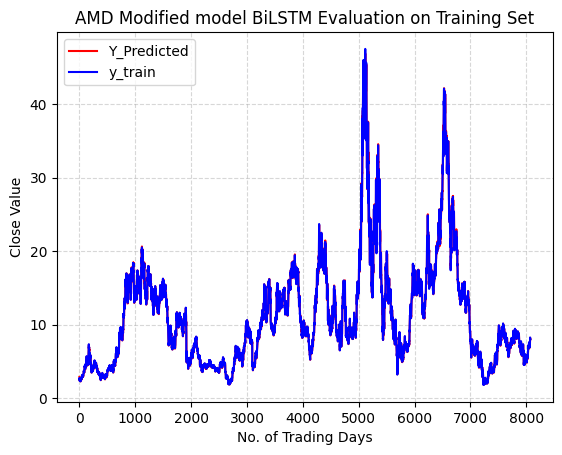

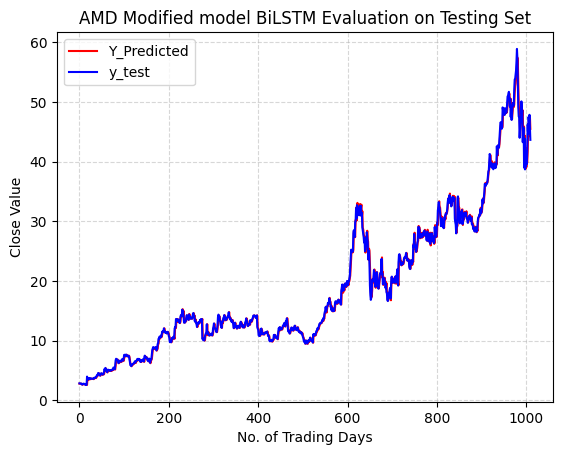

In [100]:
plt.plot(y_train_predicted_AMD_modified2,color='red', label='Y_Predicted')
plt.plot(y_train_AMD,color='blue', label='y_train')
plt.title("AMD Modified model BiLSTM Evaluation on Training Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


plt.plot(y_test_predicted_AMD_modified2,color='red', label='Y_Predicted')
plt.plot(y_test_AMD,color='blue', label='y_test')
plt.title("AMD Modified model BiLSTM Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

# Case D

Kami akan melakukan pengujian akhir seperti yang dilakukan di Case C, tapi hanya untuk model Final dari BiLSTM yang menunjukkan performa paling baik dan seimbang untuk keduanya.

## AAPL

In [117]:
print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AAPL,y_test_predicted_AAPL_modified2))

Evaluation of AAPL with Testing Set
{'rmse': 2.3591516, 'mae': 2.3591516, 'mape': 1.2718405}


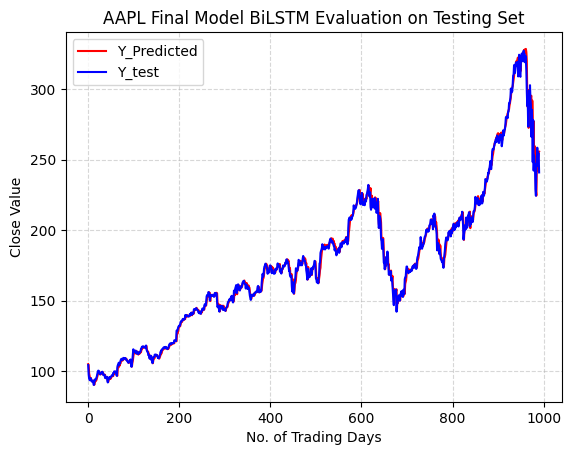

In [118]:
plt.plot(y_test_predicted_AAPL_modified2,color='red', label='Y_Predicted')
plt.plot(y_test_AAPL,color='blue', label='Y_test')
plt.title("AAPL Final Model BiLSTM Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

## AMD

In [119]:
print("Evaluation of AAPL with Testing Set")
print(evaluate_preds(y_test_AMD,y_test_predicted_AMD_modified2))

Evaluation of AAPL with Testing Set
{'rmse': 0.5205069, 'mae': 0.5205069, 'mape': 2.7475007}


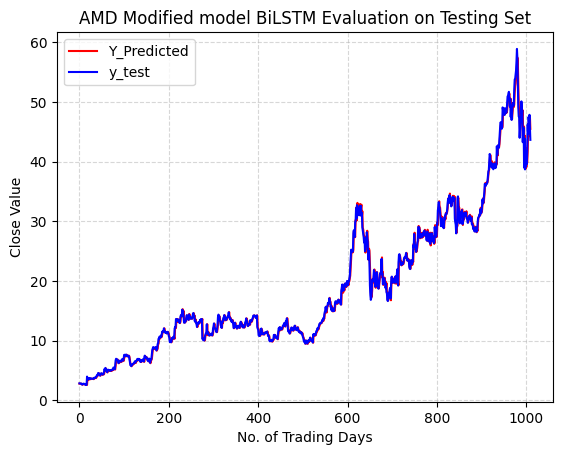

In [120]:
plt.plot(y_test_predicted_AMD_modified2,color='red', label='Y_Predicted')
plt.plot(y_test_AMD,color='blue', label='y_test')
plt.title("AMD Modified model BiLSTM Evaluation on Testing Set")
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

# Conclusion

Setelah melakukan berbagai percobaan dari hasil tuning dan modelling, dapat disimpulkan bahwa:

- Model LSTM baseline sebenarnya sudah cukup mampu memprediksi nilai saham testing set.Namun pada saham AAPL, nilai MAPE masih tidak memuaskan, dimana persentase mape masih berada di 8%

- Setelah dilakukan tuning pertama, dimana unit LSTM diperkecil menjadi sisa 20 unit, ternyata nilai mape AAPL menurun drastis menuju 1.6% dan pada AMD masih sama di sekitar 2.74%

- Pada tuning kedua, dicobalah bidirectional LSTM untuk mencari tahu apakah dapat meningkatkan performa model. Ternyata, pemodelan BiLSTM dapat meningkatkan performa kedua model.
Model AAPL memiliki mape 1.3 % dan AMD memiliki mape sebesar 2.47%. Dimana, berarti saham AAPL memiliki rata-rata kesalahan 1.3% dari nilai aslinya dan AMD memiliki rata-rata saham AMD memiliki rata-rata kesalahan 2.47% dari nilai aslinya.

- Hasil plot pencocokkan antara nilai asli dan nilai prediksi juga sudah mendapat nilai yang memuaskan, dimana garis keduanya hampir sama, menunjukkan performa model yang sudah baik

- Untuk pemodelan ini, metrik utama yang dapat dilihat adalah mape, sebab rmse dan mae kedua saham akan berbeda nilainya dengan pengujian pada training set. Hal ini dikarenakan harga saham yang terus - menerus naik sehingga perbedaan error rmse dan mse pada training set yang nilai sahamnya kecil hanya bernilai 0.xxx dan pada testing set yang nilainya sudah bernilai ratusan akan bernilai diatas 0.xxx